In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
initial_dataset_v1 = pd.read_csv('/content/drive/MyDrive/initial_dataset_v1.csv')

In [ ]:
initial_dataset_v1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,3109255,34099,16,0,Crushed Red Chili Pepper,104,13,pantry,spices seasonings,135284,prior,9,0,19,8.0
1,301098,41950,5,0,Organic Tomato Cluster,83,4,produce,fresh vegetables,7293,prior,2,4,15,1.0
2,1181866,45066,8,0,Honeycrisp Apple,24,4,produce,fresh fruits,111385,prior,2,1,17,8.0
3,1678630,8859,2,1,Natural Spring Water,115,7,beverages,water seltzer sparkling water,147365,prior,7,0,14,26.0
4,644090,24781,2,0,"PODS Laundry Detergent, Ocean Mist Designed fo...",75,17,household,laundry,99290,prior,7,0,19,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2062787,45007,3,1,Organic Zucchini,83,4,produce,fresh vegetables,15187,prior,14,1,7,8.0
9996,2538581,19849,3,1,Mystic Mango Kombucha,31,7,beverages,refrigerated,173753,prior,4,1,8,7.0
9997,2253802,37766,2,0,XL Emerald White Seedless Grapes,123,4,produce,packaged vegetables fruits,183368,prior,7,2,9,14.0
9998,2483360,16676,7,1,Vanilla Sparkling Energy Water,64,7,beverages,energy sports drinks,24651,prior,12,1,9,8.0


#Reorderd Ratio by Department

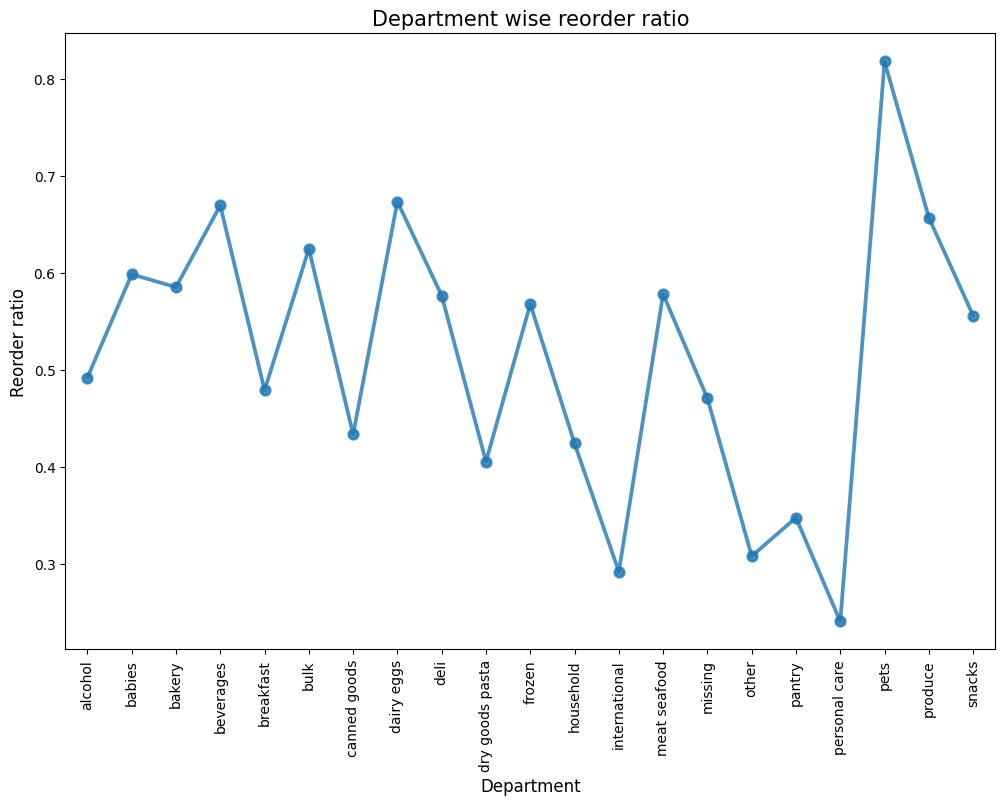

In [ ]:
grouped_df = initial_dataset_v1.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x='department', y='reordered', data=grouped_df, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()



*   Pets, dairy eggs and beverage have high reorder ratio
*   Personal care has lowest reorder ratio



#Reordered ratio vs Order of products in which they are added to cart

<ipython-input-6-792882b3882a>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  initial_dataset_v1["add_to_cart_order_mod"].loc[initial_dataset_v1["add_to_cart_order_mod"]>40] = 40
<ipython-input-6-792882b3882a>:2: SettingWithCopyWarning: 
A

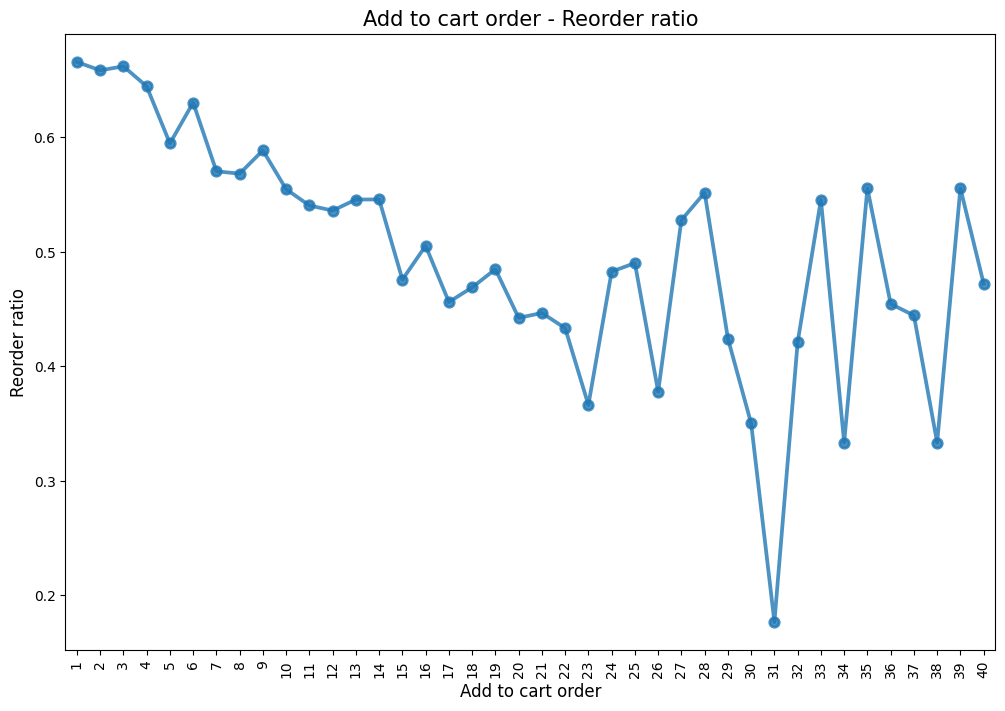

In [ ]:
initial_dataset_v1["add_to_cart_order_mod"] = initial_dataset_v1["add_to_cart_order"].copy()
initial_dataset_v1["add_to_cart_order_mod"].loc[initial_dataset_v1["add_to_cart_order_mod"]>40] = 40

grouped_df_1 = initial_dataset_v1.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = 'add_to_cart_order_mod', y = 'reordered', data = grouped_df_1 , alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the plot, insight gained is that the products that are added to the cart early are more likely to be reordered again compared to the ones added later

#Products added to cart early

In [ ]:
df_by_cart_position = initial_dataset_v1[initial_dataset_v1['add_to_cart_order'] <= 10]

df_by_cart_position = (df_by_cart_position.groupby('product_name')['add_to_cart_order']
                       .mean()
                       .reset_index(name='avg_cart_position')
                       .sort_values('avg_cart_position'))

df_by_cart_position.head(10)

,product_name,avg_cart_position
2960,Simple Favorites Chicken Enchilada Suiza,1.0
3231,Three Cheese Mini Pizza Bagels Frozen Snacks,1.0
647,Corn Muffin Mix,1.0
3228,Thirst Quencher Lemon-Lime,1.0
657,Country White Bread,1.0
1848,Organic Banana Bites,1.0
3214,The Original Charcoal Briquets,1.0
644,Corn Chips,1.0
2478,Original Flavor Instant Oatmeal,1.0
2480,Original French Vanilla Yogurt,1.0


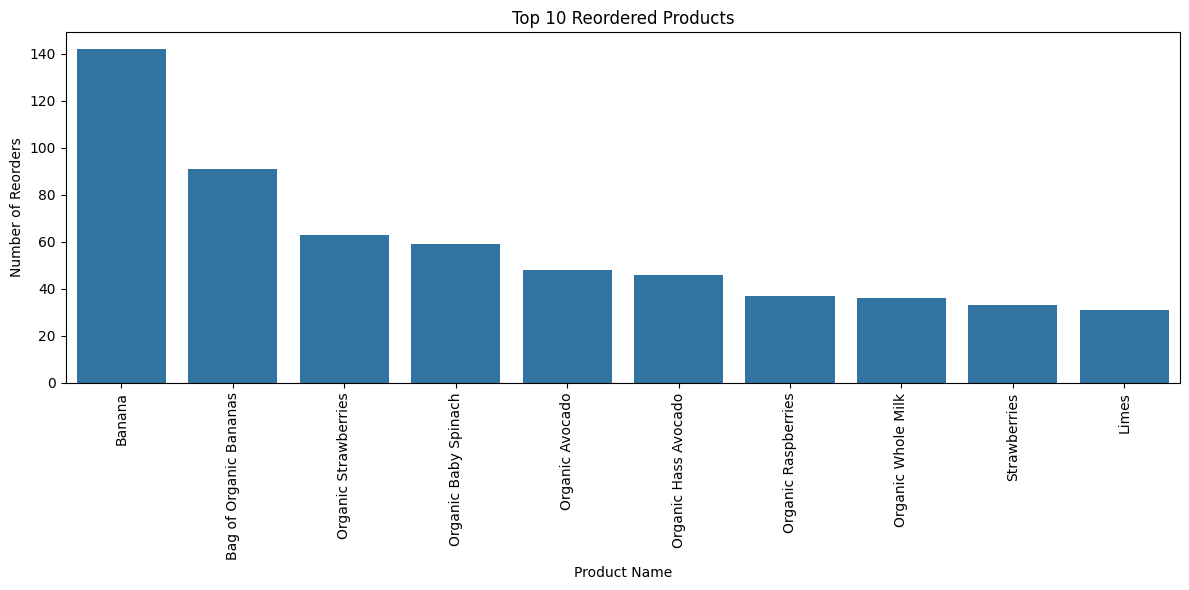

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_reordered = initial_dataset_v1.groupby('product_name')['reordered'].sum().nlargest(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_reordered.index, y=top_10_reordered.values)
plt.xticks(rotation=90)
plt.xlabel("Product Name")
plt.ylabel("Number of Reorders")
plt.title("Top 10 Reordered Products")
plt.tight_layout()
plt.show()

#Top 10 Departments by Product Count

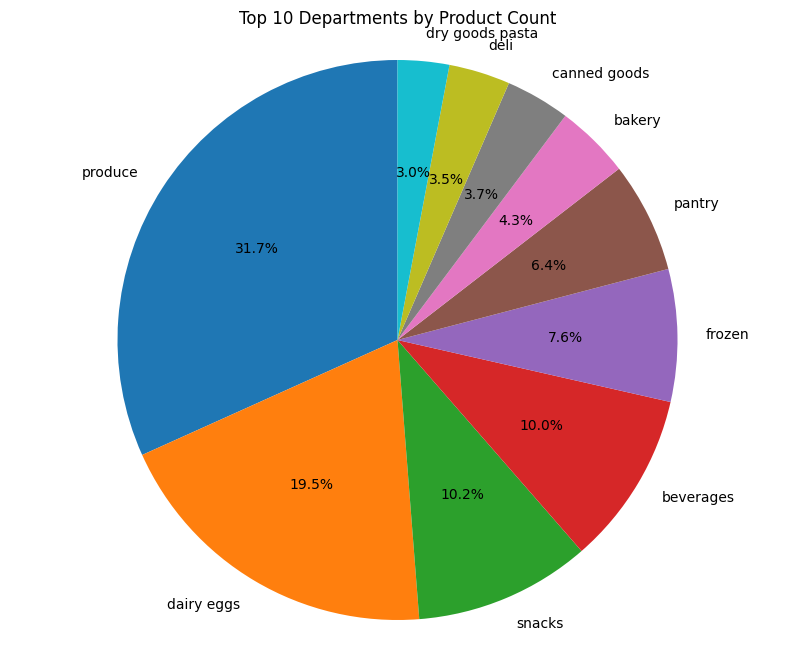

In [ ]:



# Calculate the count of products in each department
department_counts = initial_dataset_v1['department'].value_counts()

# Get the top 10 departments
top_10_departments = department_counts.head(10)

# Create the pie chart
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.pie(top_10_departments, labels=top_10_departments.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Departments by Product Count')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

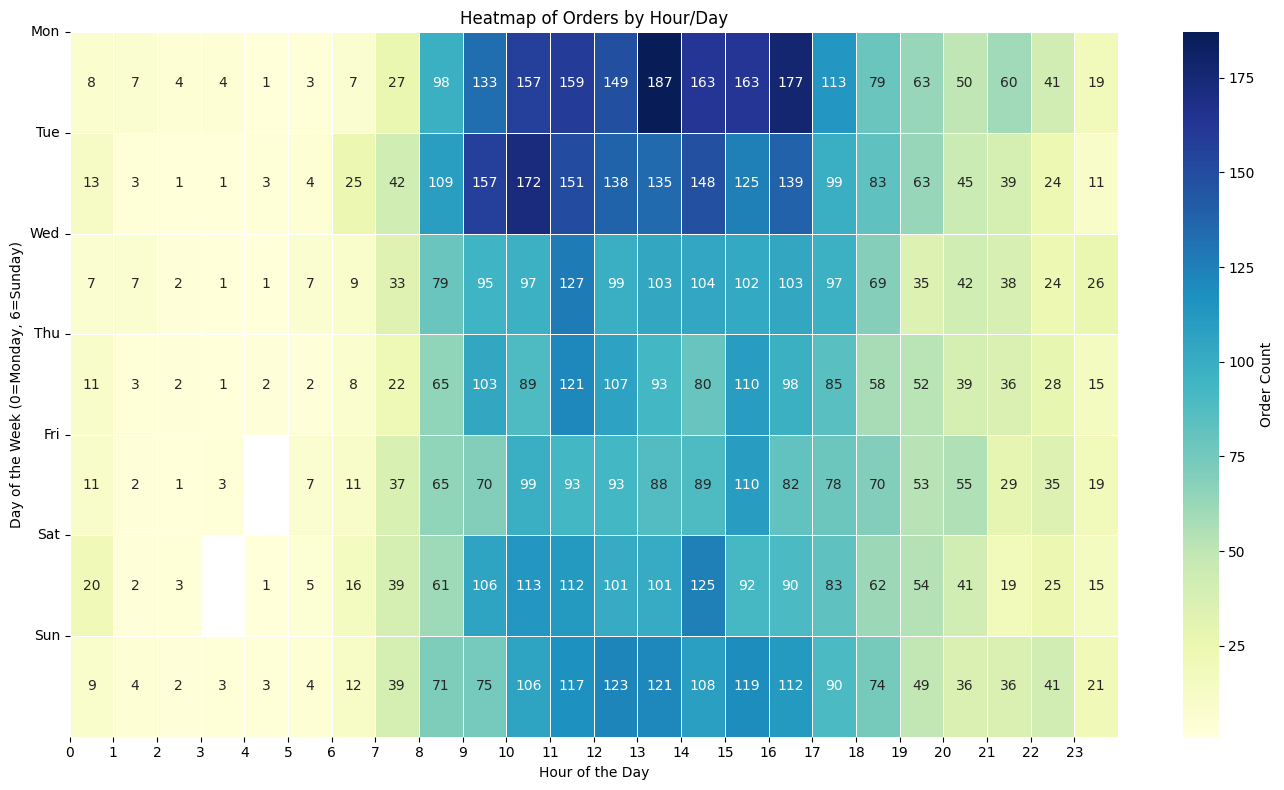

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your previous code) ...

# Step 1: Assuming 'initial_dataset_v1' is your original DataFrame
# Group by 'order_dow' and 'order_hour_of_day' and count orders
order_counts = initial_dataset_v1.groupby(['order_dow', 'order_hour_of_day'])['order_id'].count().reset_index()

# Step 3: Pivot the data so that 'order_dow' becomes rows and 'order_hour_of_day' becomes columns
# Use keyword arguments for index, columns, and values
order_heatmap_data = order_counts.pivot(index='order_dow', columns='order_hour_of_day', values='order_id')

# Step 4: Create the heatmap
plt.figure(figsize=(14, 8))
# Change the format code to '.0f' or 'g' to handle float values:
sns.heatmap(order_heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Order Count'})
# or
# sns.heatmap(order_heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, cbar_kws={'label': 'Order Count'})

plt.title('Heatmap of Orders by Hour/Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Monday, 6=Sunday)')  # or (0=Sunday, 6=Saturday) depending on your data
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])  # Set hour labels (0 to 23)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)  # Adjust day labels if necessary

# Show plot
plt.tight_layout()
plt.show()

<ipython-input-11-e3fea5a1e2fe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aisle_counts.index, y=top_aisle_counts.values, palette='Blues_d')


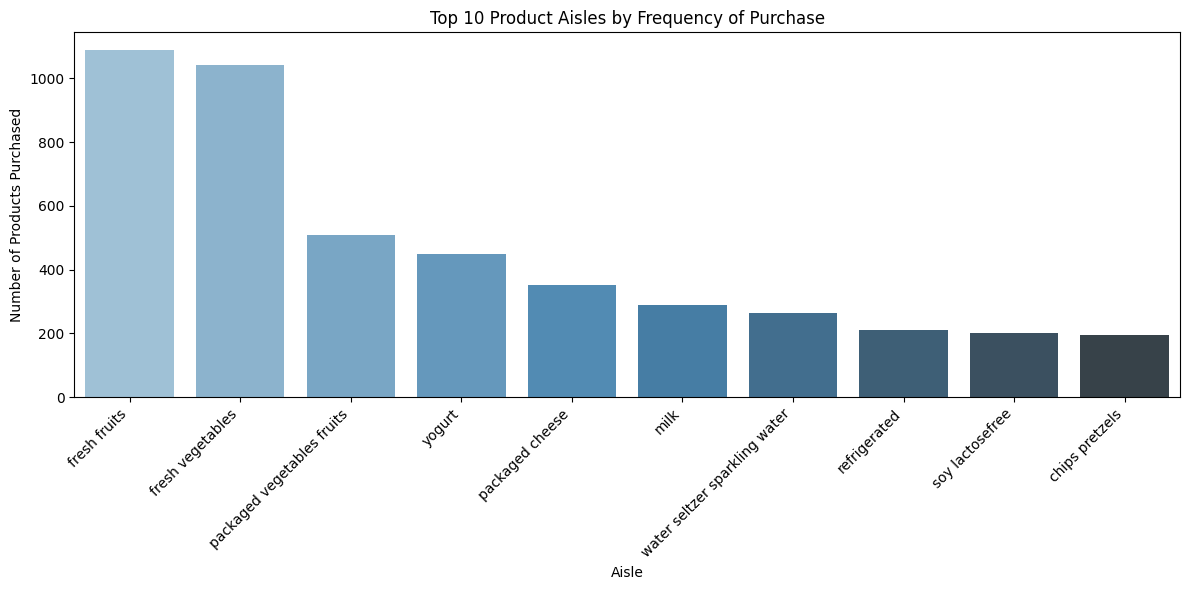

In [ ]:
# Step 1: Get the top 10 aisles
top_aisle_counts = initial_dataset_v1['aisle'].value_counts().head(10)

# Step 2: Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_aisle_counts.index, y=top_aisle_counts.values, palette='Blues_d')

# Step 3: Add titles and labels
plt.title("Top 10 Product Aisles by Frequency of Purchase")
plt.xlabel("Aisle")
plt.ylabel("Number of Products Purchased")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()



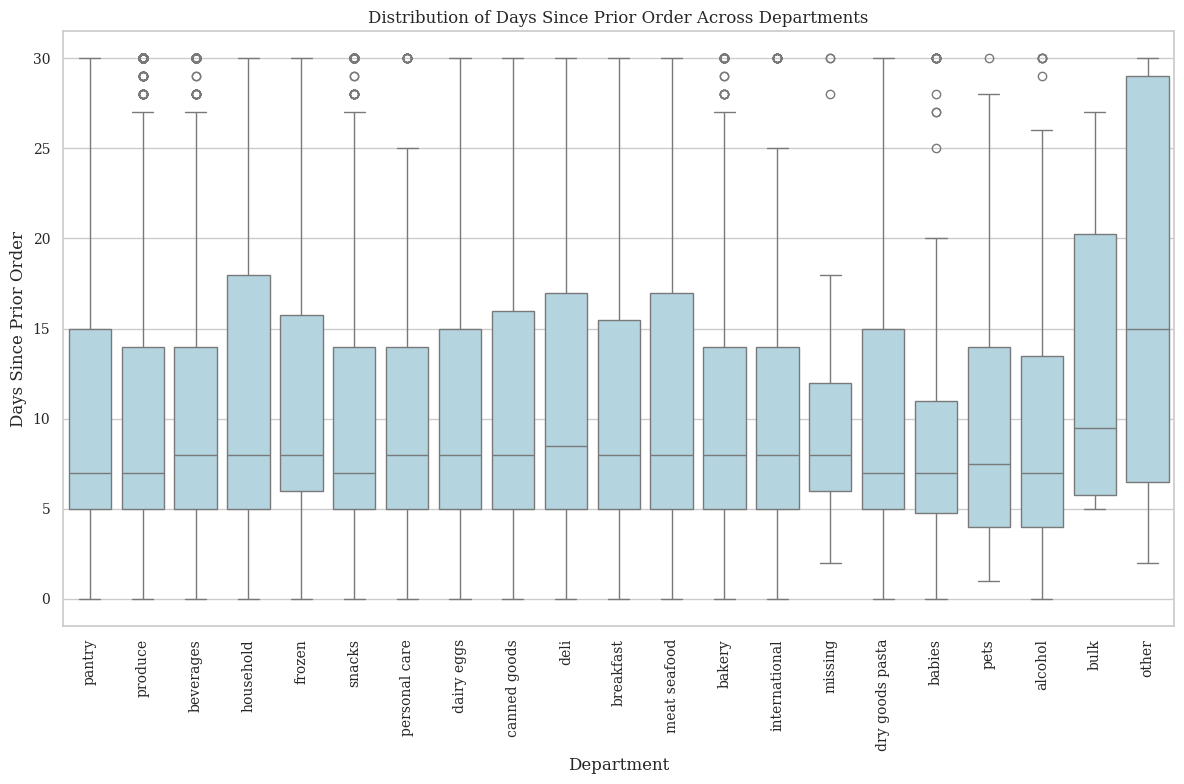

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'initial_dataset_v1' is your DataFrame
# Let's create the boxplot comparing 'days_since_prior_order' across 'department'

plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='days_since_prior_order', data=initial_dataset_v1, color='lightblue')

# Set title and labels
plt.title('Distribution of Days Since Prior Order Across Departments')
plt.xlabel('Department')
plt.ylabel('Days Since Prior Order')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


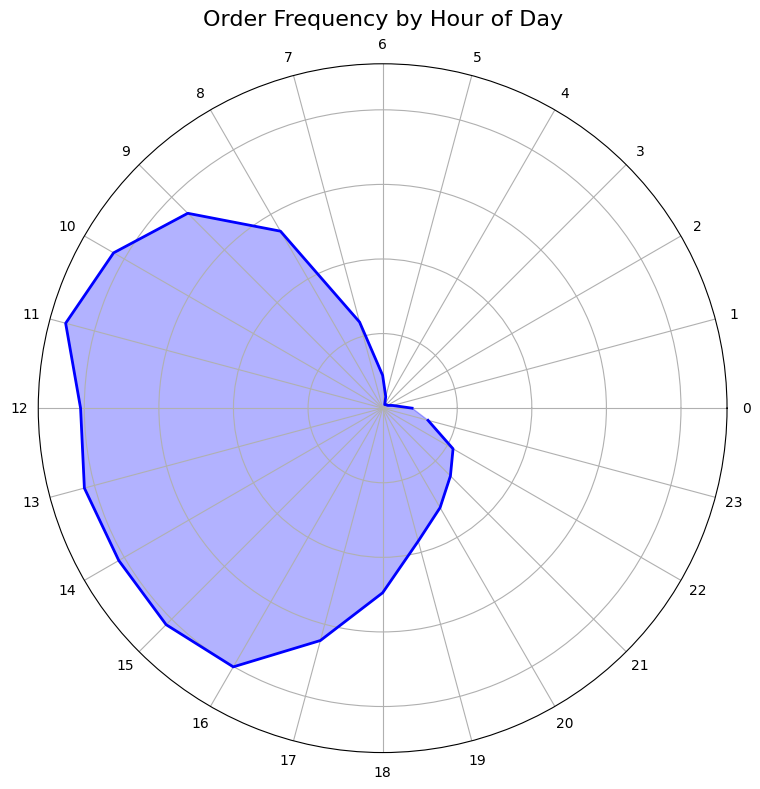

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'initial_dataset_v1' is your DataFrame
# Step 1: Group by 'order_hour_of_day' and count the number of orders
order_counts = initial_dataset_v1.groupby('order_hour_of_day')['order_id'].count().reset_index()

# Step 2: Set up the polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})

# Step 3: Prepare data for the polar plot
angles = np.linspace(0, 2 * np.pi, 24, endpoint=False)  # 24 hours in a day
order_counts = order_counts.sort_values('order_hour_of_day')  # Sort by hour
radii = order_counts['order_id'].values  # Number of orders

# Step 4: Create the polar plot
ax.plot(angles, radii, color='b', linewidth=2, linestyle='solid')  # Line plot
ax.fill(angles, radii, color='b', alpha=0.3)  # Fill under the curve

# Step 5: Customize the plot
ax.set_title('Order Frequency by Hour of Day', va='bottom', fontsize=16)
ax.set_xticks(angles)  # Set labels at the angles
ax.set_xticklabels(range(24))  # Hours of the day (0 to 23)
ax.set_yticklabels([])  # Hide the radial labels (order count labels)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming 'initial_dataset_v1' is your DataFrame

# Step 1: Group the data by department and product, counting the number of times each product appears (purchased)
product_counts = initial_dataset_v1.groupby(['department', 'product_name']).size().reset_index(name='purchase_count')

# Step 2: Find the product with the highest purchase count for each department
most_bought_products = product_counts.loc[product_counts.groupby('department')['purchase_count'].idxmax()]

# Step 3: Display the result
print(most_bought_products[['department', 'product_name', 'purchase_count']])


           department                                       product_name  \
43            alcohol                                    Sauvignon Blanc   
55             babies          Apples, Kale & Avocados Organic Baby Food   
156            bakery                             100% Whole Wheat Bread   
770         beverages                         Sparkling Water Grapefruit   
889         breakfast                                 Honey Nut Cheerios   
966              bulk                                        Dried Mango   
1064     canned goods                                Organic Black Beans   
1623       dairy eggs                                 Organic Whole Milk   
2014             deli                               Uncured Genoa Salami   
2033  dry goods pasta                                        Basil Pesto   
2230           frozen                                        Blueberries   
2636        household                         100% Recycled Paper Towels   
2850    inte

#Models

In [ ]:
!pip install dmba
!pip install shap
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1a275dfd26411cd64b205c0cd2ee7e7deeb918b224ecb7af146c04c2d4b31279
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
#loading our usual libraries
import shap


#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score, auc
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
# plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('font', size = 12)
plt.rc('figure', figsize = (6, 5))

Colab environment detected.


In [ ]:
data = initial_dataset_v1.copy()

data['days_since_prior_order'] = data['days_since_prior_order'].fillna(0)

# Encoding variables for classification (can be done us sklearn as well)
encoded_data = pd.get_dummies(data, columns=['aisle_id', 'department_id'], drop_first=True)

X = encoded_data.drop(columns=['reordered', 'product_name', 'department', 'aisle', 'eval_set'])
y = encoded_data['reordered']

In [ ]:
X

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_mod,aisle_id_2,...,department_id_12,department_id_13,department_id_14,department_id_15,department_id_16,department_id_17,department_id_18,department_id_19,department_id_20,department_id_21
0,3109255,34099,16,135284,9,0,19,8.0,16,False,...,False,True,False,False,False,False,False,False,False,False
1,301098,41950,5,7293,2,4,15,1.0,5,False,...,False,False,False,False,False,False,False,False,False,False
2,1181866,45066,8,111385,2,1,17,8.0,8,False,...,False,False,False,False,False,False,False,False,False,False
3,1678630,8859,2,147365,7,0,14,26.0,2,False,...,False,False,False,False,False,False,False,False,False,False
4,644090,24781,2,99290,7,0,19,30.0,2,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2062787,45007,3,15187,14,1,7,8.0,3,False,...,False,False,False,False,False,False,False,False,False,False
9996,2538581,19849,3,173753,4,1,8,7.0,3,False,...,False,False,False,False,False,False,False,False,False,False
9997,2253802,37766,2,183368,7,2,9,14.0,2,False,...,False,False,False,False,False,False,False,False,False,False
9998,2483360,16676,7,24651,12,1,9,8.0,7,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# prompt: Populate the name of the department instead of the id number in the dummy variables columns in X

# Create a mapping from department_id to department name
dept_mapping = initial_dataset_v1[['department_id', 'department']].drop_duplicates()
dept_mapping = dept_mapping.set_index('department_id')['department'].to_dict()

# Replace department_id columns with department names in X
for col in X.columns:
  if 'department_id' in col:
    dept_id = int(col.split('_')[-1])  # Extract department ID from column name
    if dept_id in dept_mapping:
      new_col_name = col.replace(f'department_id_{dept_id}', f'department_{dept_mapping[dept_id]}')
      X[new_col_name] = X[col]
      X = X.drop(columns=[col]) #drop original columns


In [ ]:
# prompt: Populate the name of the aisles instead of the id number in the dummy variables columns in X

# Create a mapping from aisle_id to aisle name
aisle_mapping = initial_dataset_v1[['aisle_id', 'aisle']].drop_duplicates()
aisle_mapping = aisle_mapping.set_index('aisle_id')['aisle'].to_dict()

# Replace aisle_id columns with aisle names in X
for col in X.columns:
  if 'aisle_id' in col:
    aisle_id = int(col.split('_')[-1])  # Extract aisle ID from column name
    if aisle_id in aisle_mapping:
      new_col_name = col.replace(f'aisle_id_{aisle_id}', f'aisle_{aisle_mapping[aisle_id]}')
      X[new_col_name] = X[col]
      X = X.drop(columns=[col]) #drop original columns

<ipython-input-20-b751f430c918>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[new_col_name] = X[col]
<ipython-input-20-b751f430c918>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[new_col_name] = X[col]
<ipython-input-20-b751f430c918>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[new

In [ ]:
X

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_mod,department_other,...,aisle_trail mix snack mix,aisle_feminine care,aisle_body lotions soap,aisle_tortillas flat bread,aisle_frozen appetizers sides,aisle_hot cereal pancake mixes,aisle_dry pasta,aisle_beauty,aisle_muscles joints pain relief,aisle_specialty wines champagnes
0,3109255,34099,16,135284,9,0,19,8.0,16,False,...,False,False,False,False,False,False,False,False,False,False
1,301098,41950,5,7293,2,4,15,1.0,5,False,...,False,False,False,False,False,False,False,False,False,False
2,1181866,45066,8,111385,2,1,17,8.0,8,False,...,False,False,False,False,False,False,False,False,False,False
3,1678630,8859,2,147365,7,0,14,26.0,2,False,...,False,False,False,False,False,False,False,False,False,False
4,644090,24781,2,99290,7,0,19,30.0,2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2062787,45007,3,15187,14,1,7,8.0,3,False,...,False,False,False,False,False,False,False,False,False,False
9996,2538581,19849,3,173753,4,1,8,7.0,3,False,...,False,False,False,False,False,False,False,False,False,False
9997,2253802,37766,2,183368,7,2,9,14.0,2,False,...,False,False,False,False,False,False,False,False,False,False
9998,2483360,16676,7,24651,12,1,9,8.0,7,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_mod,department_other,...,aisle_trail mix snack mix,aisle_feminine care,aisle_body lotions soap,aisle_tortillas flat bread,aisle_frozen appetizers sides,aisle_hot cereal pancake mixes,aisle_dry pasta,aisle_beauty,aisle_muscles joints pain relief,aisle_specialty wines champagnes
9069,2574352,18376,12,66735,2,1,12,7.0,12,False,...,False,False,False,False,False,False,False,False,False,False
2603,3237071,24933,2,98989,3,0,2,7.0,2,False,...,False,False,False,False,False,False,False,False,False,False
7738,1147061,39149,18,13489,10,3,7,26.0,18,False,...,False,False,False,False,False,False,False,False,False,False
1579,2929542,27966,4,42369,3,5,14,1.0,4,False,...,False,False,False,False,False,False,False,False,False,False
5058,2745100,287,1,77390,16,3,9,20.0,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,411672,29801,8,56862,1,2,16,0.0,8,False,...,False,False,False,False,False,False,False,False,False,False
5191,1170712,21512,2,47880,12,5,14,5.0,2,False,...,False,False,False,False,False,False,False,False,False,False
5390,603263,27231,19,85144,37,1,12,21.0,19,False,...,False,False,False,False,False,False,False,False,False,False
860,1698099,35535,12,46273,11,0,8,15.0,12,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,order_id,product_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order_mod,department_other,...,aisle_trail mix snack mix,aisle_feminine care,aisle_body lotions soap,aisle_tortillas flat bread,aisle_frozen appetizers sides,aisle_hot cereal pancake mixes,aisle_dry pasta,aisle_beauty,aisle_muscles joints pain relief,aisle_specialty wines champagnes
9069,2574352,18376,12,66735,2,1,12,7.0,12,False,...,False,False,False,False,False,False,False,False,False,False
2603,3237071,24933,2,98989,3,0,2,7.0,2,False,...,False,False,False,False,False,False,False,False,False,False
7738,1147061,39149,18,13489,10,3,7,26.0,18,False,...,False,False,False,False,False,False,False,False,False,False
1579,2929542,27966,4,42369,3,5,14,1.0,4,False,...,False,False,False,False,False,False,False,False,False,False
5058,2745100,287,1,77390,16,3,9,20.0,1,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,411672,29801,8,56862,1,2,16,0.0,8,False,...,False,False,False,False,False,False,False,False,False,False
5191,1170712,21512,2,47880,12,5,14,5.0,2,False,...,False,False,False,False,False,False,False,False,False,False
5390,603263,27231,19,85144,37,1,12,21.0,19,False,...,False,False,False,False,False,False,False,False,False,False
860,1698099,35535,12,46273,11,0,8,15.0,12,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
DTsalesreg_bag=RandomForestRegressor(max_features=160, random_state=42) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_RF=RandomForestRegressor(max_features=159, random_state=42)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=42)

In [ ]:
# Fit the bagging model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_bag.fit(X_train, Y_train)

# Fit the random forest model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_RF.fit(X_train, Y_train)

# Fit the boosting model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_boost.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=42)

In [ ]:
DTbag_predictions_tr=DTsalesreg_bag.predict(X_test) # predictions for training set

DTRF_predictions_tr=DTsalesreg_RF.predict(X_test) # predictions for training set

DTboost_predictions_tr=DTsalesreg_boost.predict(X_test) # predictions for training set

In [ ]:
# How good is this prediction of bagging in training?
regressionSummary(Y_test, DTbag_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_test, DTRF_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_test,DTboost_predictions_tr)


Regression statistics

               Mean Error (ME) : -0.0011
Root Mean Squared Error (RMSE) : 0.4337
     Mean Absolute Error (MAE) : 0.3626

Regression statistics

               Mean Error (ME) : -0.0010
Root Mean Squared Error (RMSE) : 0.4341
     Mean Absolute Error (MAE) : 0.3629

Regression statistics

               Mean Error (ME) : 0.0003
Root Mean Squared Error (RMSE) : 0.4222
     Mean Absolute Error (MAE) : 0.3729


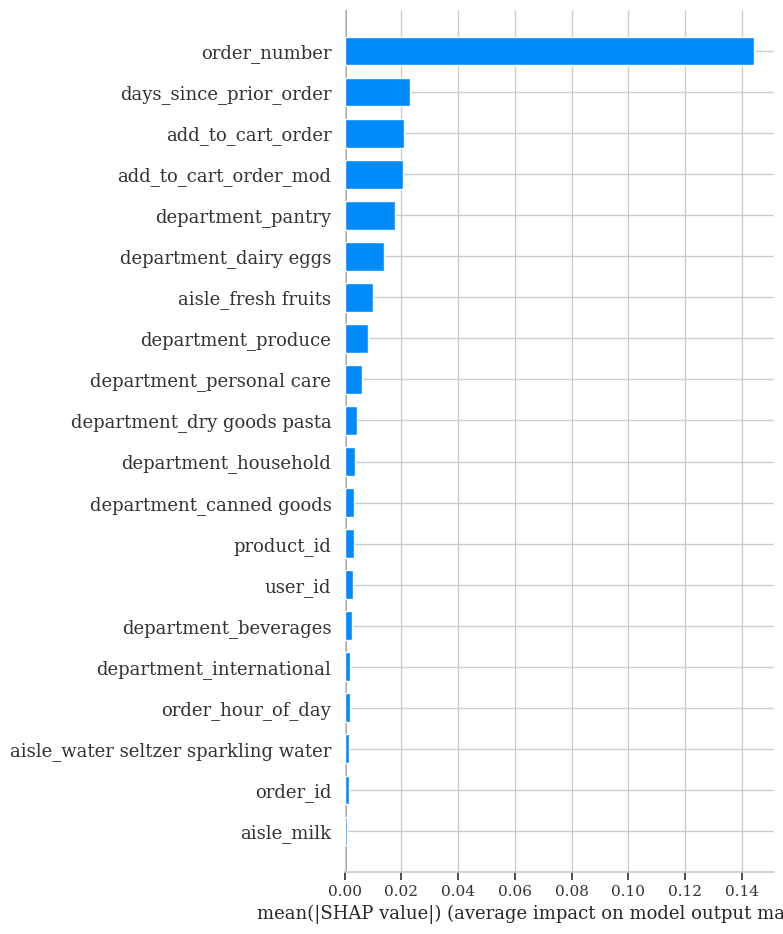

In [ ]:
# prompt: variable importance plot of boosting model

import matplotlib.pyplot as plt

# Explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(DTsalesreg_boost)
shap_values = explainer.shap_values(X_test)

# Visualize the first prediction's explanation (use matplotlib=True for better visuals)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Alternatively, create a summary plot without the bar plot
# shap.summary_plot(shap_values, X_test)

plt.show()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
X.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'user_id',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order_mod', 'department_other',
       ...
       'aisle_trail mix snack mix', 'aisle_feminine care',
       'aisle_body lotions soap', 'aisle_tortillas flat bread',
       'aisle_frozen appetizers sides', 'aisle_hot cereal pancake mixes',
       'aisle_dry pasta', 'aisle_beauty', 'aisle_muscles joints pain relief',
       'aisle_specialty wines champagnes'],
      dtype='object', length=161)

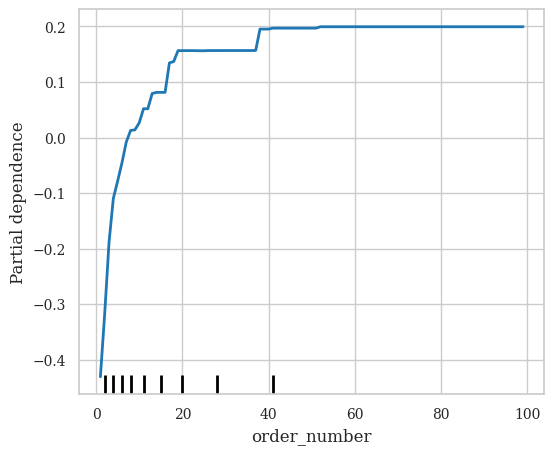

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = [4]

# Pass the trained model object (DTsalesreg_boost) instead of predictions
PartialDependenceDisplay.from_estimator(DTsalesreg_boost, X, features)

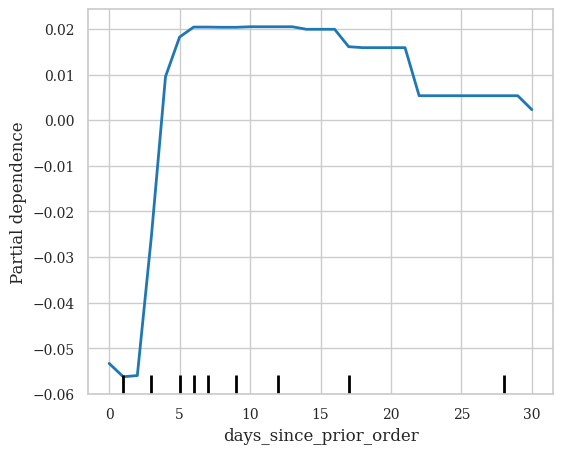

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = [7]

# Pass the trained model object (DTsalesreg_boost) instead of predictions
PartialDependenceDisplay.from_estimator(DTsalesreg_boost, X, features)

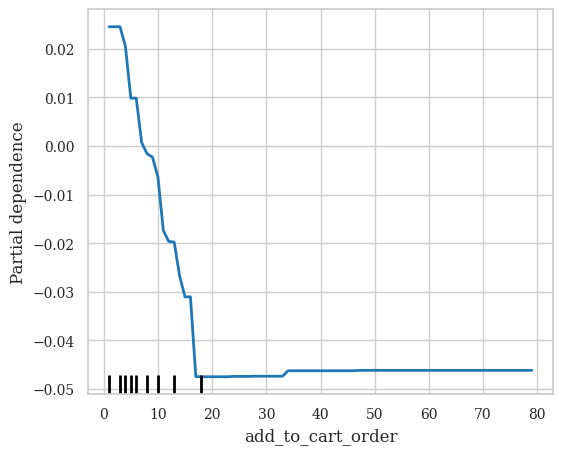

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = [2]

# Pass the trained model object (DTsalesreg_boost) instead of predictions
PartialDependenceDisplay.from_estimator(DTsalesreg_boost, X, features)

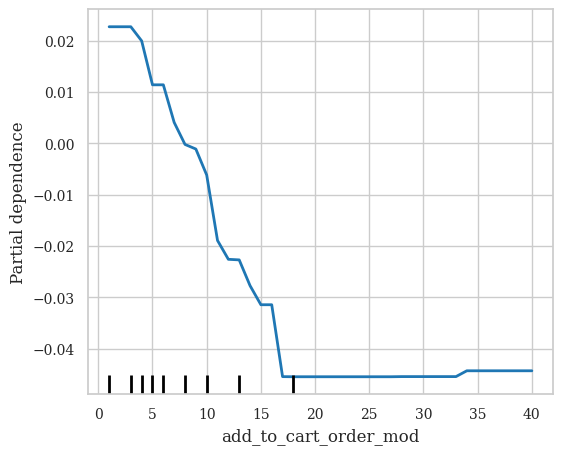

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

features = [8]

# Pass the trained model object (DTsalesreg_boost) instead of predictions
PartialDependenceDisplay.from_estimator(DTsalesreg_boost, X, features)